In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\QueryResults.csv")
df

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [3]:
df = df.rename(columns={"m": "date", "TagName": "Tag", "Unnamed: 2": "Posts"})

# most popular languages
df.groupby("Tag").Posts.sum().sort_values(ascending=False)

Tag
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: Posts, dtype: int64

In [4]:
# the number of non-NaN entries in each column
df.count()

date     1991
Tag      1991
Posts    1991
dtype: int64

In [5]:
df.groupby("Tag").count()

,date,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [6]:
df.loc[df.Tag == "python"]

,date,Tag,Posts
4,2008-08-01 00:00:00,python,124
19,2008-09-01 00:00:00,python,542
31,2008-10-01 00:00:00,python,510
37,2008-11-01 00:00:00,python,452
56,2008-12-01 00:00:00,python,441
...,...,...,...
1926,2020-03-01 00:00:00,python,26673
1946,2020-04-01 00:00:00,python,32605
1958,2020-05-01 00:00:00,python,34478
1973,2020-06-01 00:00:00,python,31817


In [7]:
# convert the date column into datetime format

df.date = pd.to_datetime(df.date)
df

,date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [8]:
# reindex the rows and columns with respect to dates and languages
df = df.pivot(index="date", columns="Tag", values="Posts")

In [9]:
df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [10]:
df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [11]:
# replace NaN's with 0
df.fillna(0, inplace=True)
df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [12]:
df.isna().values.any()

False

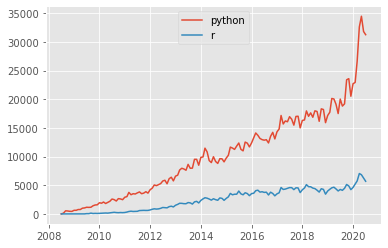

In [13]:
dates = df.index
plt.plot(df.index, df.python, label="python")
plt.plot(df.index, df.r, label="r")
leg = plt.legend(loc='upper center')


In [14]:
df.Tag

AttributeError: 'DataFrame' object has no attribute 'Tag'